## Machine Learning Algorithms on twitter-less Indigo data for the year 2019

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [90]:
df = pd.read_csv("fit_data_twitter.csv") 

In [91]:
df = df.drop(['day','month','polarity','subjectivity','tweet_volume'], axis=1)
df

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,A_WindGustKmph,A_cloudcover,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time
0,7.50,8.6,9.2,7.29,6.2,9.0,3.0,73.0,-29.0,7.9,...,7.0,32.0,61.0,0.0,1011.0,28.0,10.0,344.0,6.0,6.0
1,7.50,8.6,9.2,7.29,6.2,9.0,3.0,73.0,-29.0,7.9,...,7.0,32.0,61.0,0.0,1011.0,28.0,10.0,344.0,6.0,6.0
2,7.50,8.6,9.2,7.29,6.2,9.0,3.0,73.0,-29.0,7.9,...,7.0,32.0,61.0,0.0,1011.0,28.0,10.0,344.0,6.0,6.0
3,7.00,8.5,8.7,7.99,7.3,9.1,14.0,129.0,-7.0,7.9,...,5.0,0.0,21.0,0.0,1010.0,32.0,10.0,288.0,4.0,8.0
4,7.00,8.5,8.7,7.99,7.3,9.1,14.0,129.0,-7.0,7.9,...,5.0,0.0,21.0,0.0,1010.0,32.0,10.0,288.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,7.50,8.6,9.2,7.99,7.3,9.1,14.0,153.0,-3.0,7.9,...,9.0,3.0,67.0,0.0,1017.0,14.0,10.0,283.0,8.0,6.0
1367,7.29,6.2,9.0,7.99,7.3,9.1,12.0,105.0,-22.0,7.9,...,10.0,7.0,63.0,0.0,1018.0,14.0,10.0,288.0,9.0,8.0
1368,7.00,8.5,8.7,7.99,7.3,9.1,9.0,130.0,-11.0,7.9,...,6.0,6.0,45.0,0.0,1017.0,19.0,10.0,187.0,4.0,8.0
1369,7.00,8.5,8.7,7.99,7.3,9.1,0.0,131.0,-29.0,7.9,...,9.0,5.0,65.0,0.0,1018.0,14.0,10.0,286.0,8.0,7.0


# Outlier Detection

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


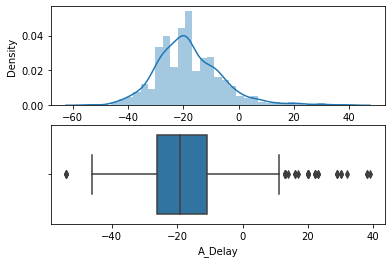

In [92]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
df['A_Delay']=np.where(df['A_Delay']>=40,df['A_Delay'].median(),df['A_Delay'])
plot(df,'A_Delay')

## Feature Selection

In [93]:
from sklearn.feature_selection import mutual_info_classif

In [94]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
D_Delay,0.686268
Duration,0.602061
D_winddirDegree,0.581278
A_winddirDegree,0.562859
D_humidity,0.501339
A_humidity,0.488674
D_cloudcover,0.446227
A_DewPointC,0.443182
D_tempC,0.422804
D_pressure,0.409241


### Observably features A_precipMM and D_precipMM are contributing the least to the target variable prediction

## Train Test Split

In [95]:
data = df

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
PT = PowerTransformer(method = "yeo-johnson")
X_train,X_test,y_train,y_test = tts(data.drop('A_Delay', axis = 1),data['A_Delay'],test_size = 0.3,random_state = 1)

PT.fit(y_train.to_numpy().reshape(-1,1))
lamb = PT.lambdas_

yt_train = PT.transform(y_train.to_numpy().reshape(-1,1))
yt_test = PT.transform(y_test.to_numpy().reshape(-1,1))

from sklearn.preprocessing import PolynomialFeatures
PF = PolynomialFeatures(2);

data_p = PF.fit_transform(data.drop('A_Delay',axis = 1))

Xp_train,Xp_test,y_train,y_test = tts(data_p,data['A_Delay'],test_size = 0.3,random_state = 1)

In [97]:
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,yt_train)
print(mean_squared_error(RFR.predict(Xp_train),yt_train))
print(mean_squared_error(RFR.predict(Xp_test),yt_test))


<ipython-input-97-9d9bfed11f7b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(Xp_train,yt_train)


0.029624417194587676
0.13031684357109183


## Selecting top 60 features

In [98]:
from sklearn.feature_selection import SelectKBest ,mutual_info_regression
SKB = SelectKBest(mutual_info_regression,60)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass k=60 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [99]:
SKB.fit(Xp_train,yt_train)
Xpt60_train = SKB.transform(Xp_train)
Xpt60_test = SKB.transform(Xp_test)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [100]:
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xpt60_train,yt_train)
print(mean_squared_error(RFR.predict(Xpt60_train),yt_train))
print(mean_squared_error(RFR.predict(Xpt60_test),yt_test))

<ipython-input-100-16d462363d62>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(Xpt60_train,yt_train)


0.06100334943778405
0.13998613050380054


## Using SVM output in RFR

In [101]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly',degree = 1, C = 1.0 , max_iter = 10000)

In [102]:
svr.fit(Xpt60_train,yt_train)
print(mean_squared_error(svr.predict(Xpt60_train),yt_train))
print(mean_squared_error(svr.predict(Xpt60_test),yt_test))

0.8910843047037312
0.8321496651321534


C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [103]:
X_train_svm = np.concatenate([Xpt60_train,svr.predict(Xpt60_train).reshape(-1,1)],axis = 1)
X_test_svm = np.concatenate([Xpt60_test,svr.predict(Xpt60_test).reshape(-1,1)],axis = 1)

data_svm = np.concatenate([X_train_svm,X_test_svm],axis = 0)

In [104]:
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train_svm,yt_train)
print(mean_squared_error(RFR.predict(X_train_svm),yt_train))
print(mean_squared_error(RFR.predict(X_test_svm),yt_test))

<ipython-input-104-9c655a26feb1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train_svm,yt_train)


0.06046017080300197
0.140956127851462


In [105]:
g1 = PT.inverse_transform(RFR.predict(X_test_svm).reshape(-1,1)).reshape(-1,)
g2 = PT.inverse_transform(yt_test.reshape(-1,1)).reshape(-1,)

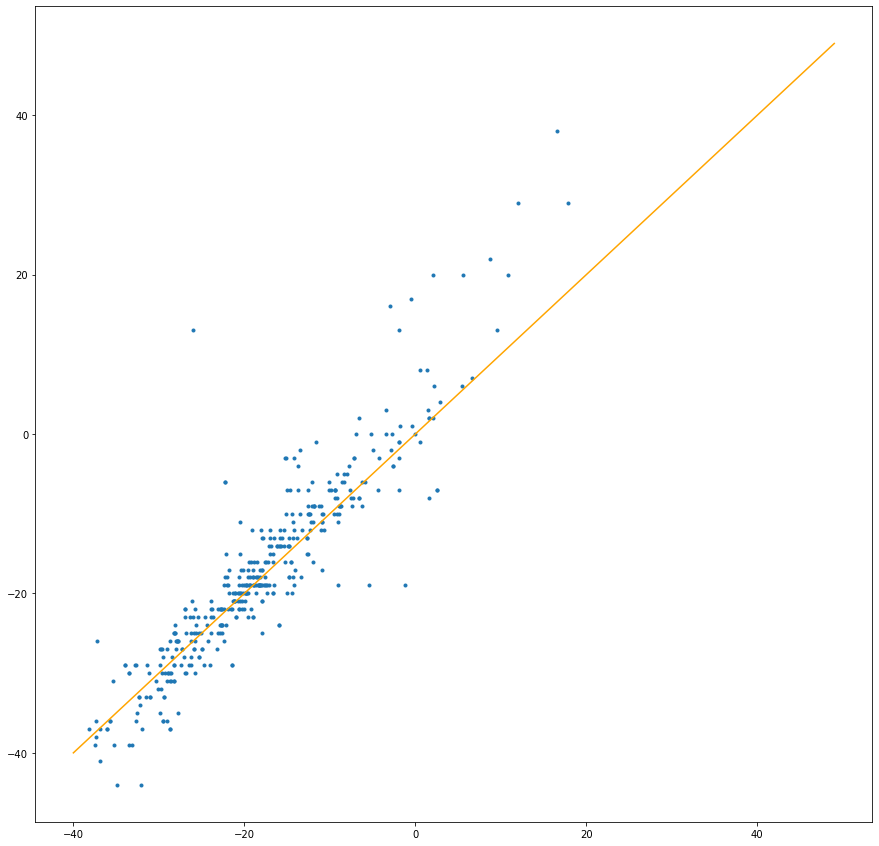

In [106]:
# LOOKING AT THE PREDICTIONS VISUALLY
# PREDICTED VS ACTUAL GRAPH
# y = x line (ORANGE)

plt.figure(figsize=(15,15))
plt.plot(np.arange(-40,50),np.arange(-40,50), color = 'orange')
plt.scatter(g1,g2, marker = '.')